In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [3]:
df = pd.read_csv("Sample - Superstore.csv",encoding = 'latin1')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.groupby("Product Name")["Sales"].max()

Product Name
"While you Were Out" Message Book, One Form per Page                                                     8.904
#10 Gummed Flap White Envelopes, 100/Box                                                                16.520
#10 Self-Seal White Envelopes                                                                           66.540
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             125.360
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 55.936
                                                                                                        ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    209.500
iOttie HLCRIO102 Car Mount                                                                             119.940
iOttie XL Car Mount                                                                                

In [10]:
product_units = df.groupby("Product Name")["Sales"].sum()

In [11]:
product_units

Product Name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

## Top_Selling_Product

In [13]:
top_selling_product = product_units.idxmax()# Finding the top-selling product

In [14]:
print(f"Top selling product : {top_selling_product}")

Top selling product : Canon imageCLASS 2200 Advanced Copier


In [15]:
top_product_sales = df[df["Product Name"] == top_selling_product]["Sales"].sum()# Calculating total revenue for the top-selling product

In [16]:
print(f"Top Sales for '{top_selling_product}': {top_product_sales}")

Top Sales for 'Canon imageCLASS 2200 Advanced Copier': 61599.824


In [17]:
# Group by Product Name and get total sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

In [18]:
top_products = top_products.reset_index()

In [19]:
top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479


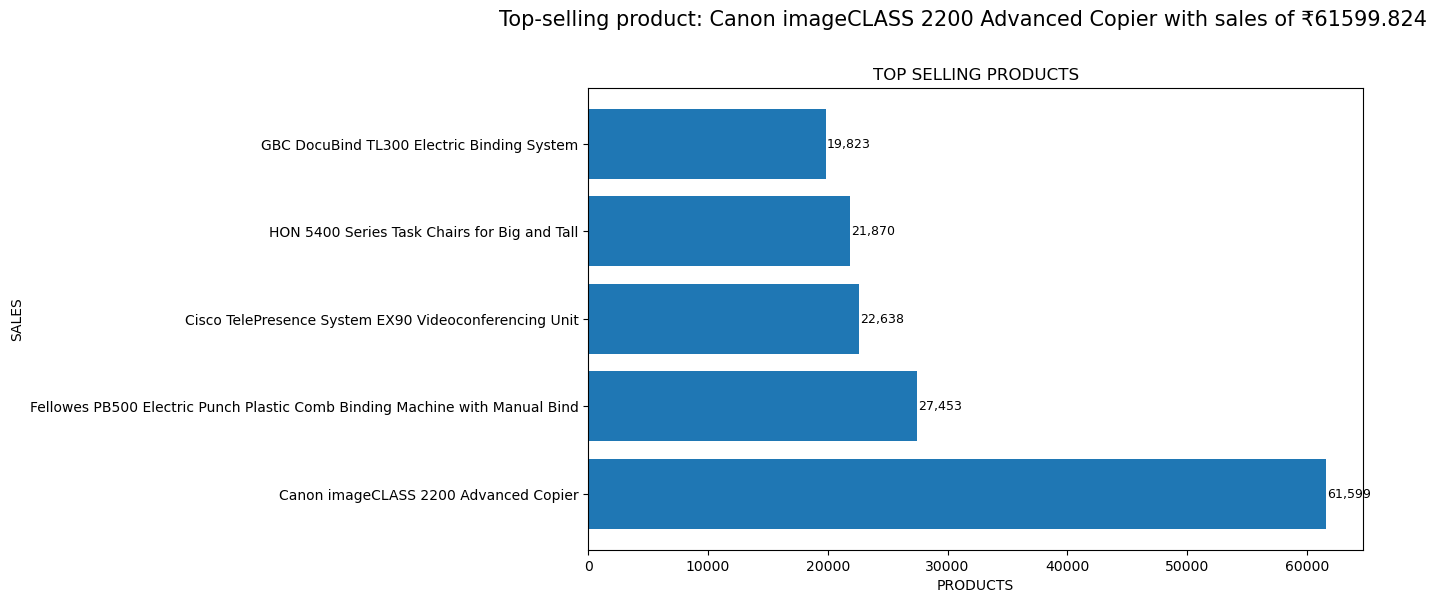

In [20]:
# Plotting the top revenue of products using a styled Bar graph
plt.figure(figsize =(10,6))
plt.barh(top_products["Product Name"],top_products["Sales"],label = "Total Revenue")
plt.xlabel('PRODUCTS')
plt.ylabel('SALES')
plt.title('TOP SELLING PRODUCTS')
plt.suptitle("Top-selling product: Canon imageCLASS 2200 Advanced Copier with sales of ₹61599.824", fontsize=15, y=1.01)


for index, value in enumerate(top_products['Sales']):
    plt.text(value + 100, index, f'{int(value):,}', va='center', fontsize=9)


## Bottom Selling Products

In [22]:
profit_on_each_product = df.groupby("Product Name")["Sales"].sum()

In [23]:
profit_on_each_product

Product Name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [24]:
bottom_selling_product = profit_on_each_product.idxmin()# Finding the bottom-selling product

In [25]:
print(f"Bottom selling product : {bottom_selling_product}")

Bottom selling product : Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac


In [26]:
bottom_product_sales = df[df["Product Name"] == bottom_selling_product]["Sales"].sum()# Calculating total revenue for the bottom-selling product

In [27]:
print(f"Bottom Sales for {bottom_selling_product}: {bottom_product_sales}")

Bottom Sales for Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac: 1.624


In [28]:
# Group by Product Name and get total sales
bottom_products = df.groupby('Product Name')['Sales'].sum().head(5)

In [29]:
bottom_products = bottom_products.reset_index()

In [30]:
bottom_products

,Product Name,Sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672


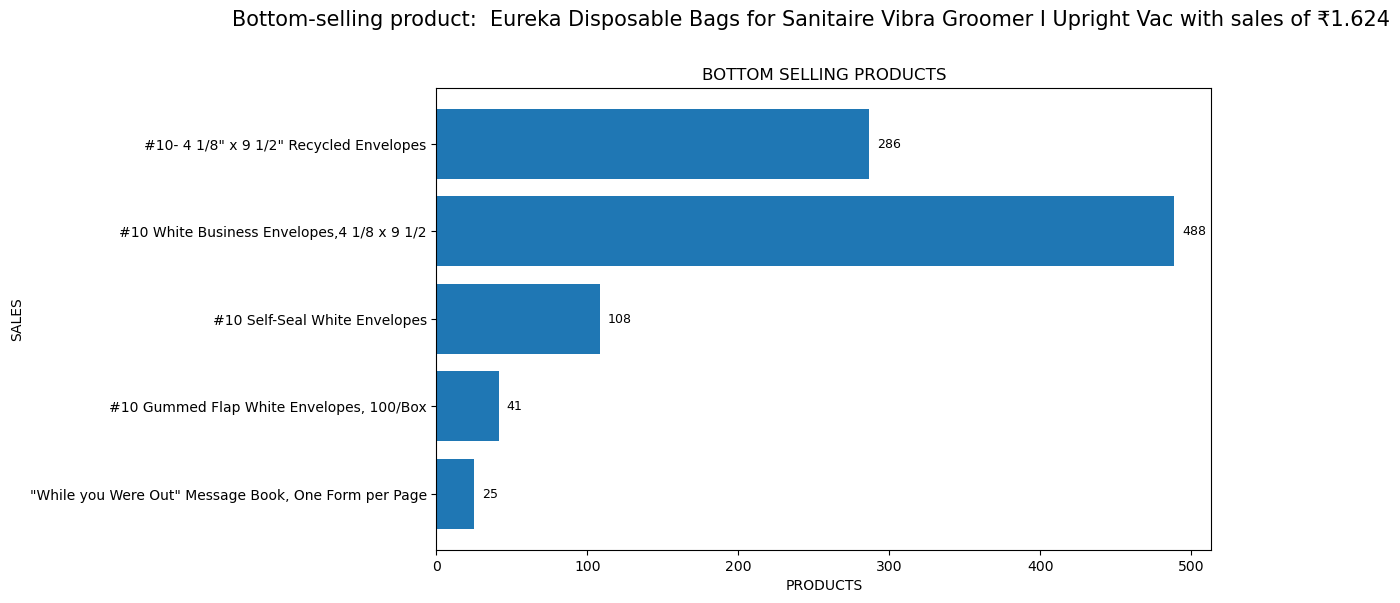

In [31]:
# Plotting the least revenue of products using a styled Bar graph
plt.figure(figsize =(10,6))
plt.barh(bottom_products["Product Name"],bottom_products["Sales"],label = "Total Revenue")
plt.xlabel('PRODUCTS')
plt.ylabel('SALES')
plt.title('BOTTOM SELLING PRODUCTS')
plt.suptitle("Bottom-selling product:  Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac with sales of ₹1.624", fontsize=15, y=1.01)

for index, value in enumerate(bottom_products['Sales']):
    plt.text(value + 5, index, f'{int(value):,}', va='center', fontsize=9)


##  Segment-wise Sales & Profit Compare

## By Sales

In [34]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False) # By sales

In [35]:
segment_sales

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

In [36]:
top_segment_by_sales = segment_sales.idxmax()     

In [37]:
print(f"Top segment : {top_segment_by_sales}")

Top segment : Consumer


In [38]:
top_sales = segment_sales.max()

In [39]:
print(f"Top sales by segment '{top_segment_by_sales}' : {top_sales}")

Top sales by segment 'Consumer' : 1161401.345


## By Profit

In [41]:
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False) # By profit

In [42]:
segment_profit

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

In [43]:
top_segment_by_profit = segment_sales.idxmax()    

In [44]:
print(f"Top segment : {top_segment_by_profit}")

Top segment : Consumer


In [45]:
top_profit = segment_sales.max()

In [46]:
print(f"Top profit by segment '{top_segment_by_profit}': {top_profit}")

Top profit by segment 'Consumer': 1161401.345


## "Consumer segment has the highest sales and also leads in total profit."

In [48]:
segment_data = df.groupby('Segment')[['Sales', 'Profit']].sum()

In [49]:
segment_data = segment_data.reset_index()

In [50]:
segment_data

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


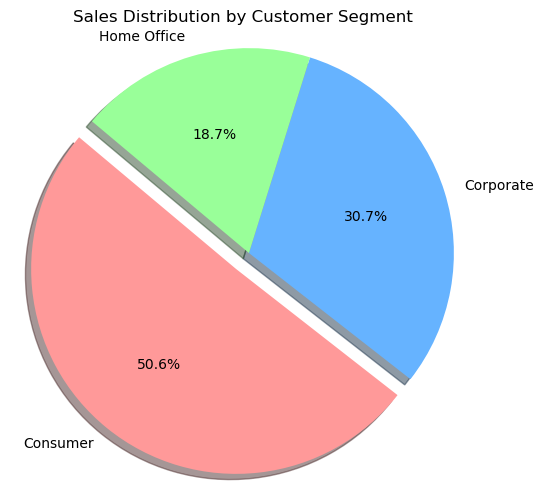

In [51]:
# Pie chart
explode = [0.1, 0, 0]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(6,6))
plt.pie(segment_data["Sales"], 
        labels=segment_data["Segment"], 
        autopct='%1.1f%%', 
        startangle=140, 
        shadow=True,
        explode=explode,
        colors=colors)
plt.title('Sales Distribution by Customer Segment')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()
